In [2]:
from __future__ import print_function

import collections
import tensorflow as tf
import tensorflow_probability as tfp

/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sbittner/anaconda/envs/epi/lib/python3.6/s

In [3]:
try:
    tf.compat.v1.enable_eager_execution()
except ValueError:
    pass

import matplotlib.pyplot as plt

In [4]:
tfd = tfp.distributions

In [5]:
n = tfd.Normal(loc=0., scale=1.)
print(n)

tfp.distributions.Normal("Normal/", batch_shape=[], event_shape=[], dtype=float32)


In [6]:
n.sample()

<tf.Tensor: id=22, shape=(), dtype=float32, numpy=-0.6051835>

In [7]:
n.sample(3)

<tf.Tensor: id=47, shape=(3,), dtype=float32, numpy=array([ 1.6427974 , -0.3100694 , -0.02506193], dtype=float32)>

In [8]:
n.log_prob(0)

<tf.Tensor: id=59, shape=(), dtype=float32, numpy=-0.9189385>

In [9]:
n.log_prob([0., 2., 4.])

<tf.Tensor: id=70, shape=(3,), dtype=float32, numpy=array([-0.9189385, -2.9189386, -8.918939 ], dtype=float32)>

In [10]:
b = tfd.Bernoulli(probs=0.7)
b

<tfp.distributions.Bernoulli 'Bernoulli/' batch_shape=[] event_shape=[] dtype=int32>

In [11]:
b.sample()

<tf.Tensor: id=99, shape=(), dtype=int32, numpy=1>

In [12]:
b.log_prob(1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<tf.Tensor: id=114, shape=(), dtype=float32, numpy=-0.35667494>

In [13]:
b.log_prob([1,0,1,0])

<tf.Tensor: id=136, shape=(4,), dtype=float32, numpy=array([-0.35667494, -1.2039728 , -0.35667494, -1.2039728 ], dtype=float32)>

## Multivariate Distributions

In [14]:
nd = tfd.MultivariateNormalDiag(loc=[0., 10.], scale_diag=[1., 4.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag/' batch_shape=[] event_shape=[2] dtype=float32>

In [15]:
tfd.Normal(loc=0., scale=1.)

<tfp.distributions.Normal 'Normal/' batch_shape=[] event_shape=[] dtype=float32>

In [16]:
nd.sample()

<tf.Tensor: id=219, shape=(2,), dtype=float32, numpy=array([1.2851222, 8.377997 ], dtype=float32)>

In [17]:
nd.sample(5)

<tf.Tensor: id=271, shape=(5, 2), dtype=float32, numpy=
array([[-0.1502867 ,  8.903416  ],
       [ 1.1981764 , 14.906639  ],
       [-0.15073809, 15.226706  ],
       [-0.4117249 ,  5.528984  ],
       [-0.43800354, 13.712535  ]], dtype=float32)>

In [18]:
nd.log_prob([0., 10])

<tf.Tensor: id=331, shape=(), dtype=float32, numpy=-3.2241714>

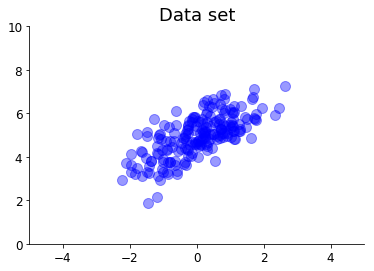

In [20]:
nd = tfd.MultivariateNormalFullCovariance(
    loc = [0., 5], covariance_matrix = [[1., .7], [.7, 1.]])
data = nd.sample(200)
plt.scatter(data[:,0], data[:,1], color='blue', alpha=0.4)
plt.axis([-5, 5, 0, 10])
plt.title("Data set")
plt.show()

## Multiple Distributions

In [21]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])
b3

<tfp.distributions.Bernoulli 'Bernoulli/' batch_shape=[3] event_shape=[] dtype=int32>

In [22]:
b3.sample()

<tf.Tensor: id=579, shape=(3,), dtype=int32, numpy=array([1, 1, 0], dtype=int32)>

In [23]:
b3.sample(6)

<tf.Tensor: id=605, shape=(6, 3), dtype=int32, numpy=
array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 1],
       [0, 0, 1],
       [0, 0, 0]], dtype=int32)>

In [24]:
b3.prob([1,1,0])

<tf.Tensor: id=621, shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.29999998], dtype=float32)>

## Using Independent To Aggregate Batches to Events

In [27]:
b3_joint = tfd.Independent(b3, reinterpreted_batch_ndims=1)
b3_joint

<tfp.distributions.Independent 'IndependentBernoulli/' batch_shape=[] event_shape=[3] dtype=int32>

In [28]:
b3

<tfp.distributions.Bernoulli 'Bernoulli/' batch_shape=[3] event_shape=[] dtype=int32>

In [29]:
b3_joint.prob([1,1,0])

<tf.Tensor: id=644, shape=(), dtype=float32, numpy=0.044999998>

In [30]:
tf.reduce_prod(b3.prob([1,1,0]))

<tf.Tensor: id=661, shape=(), dtype=float32, numpy=0.044999994>

## Batches of Multivariate Distributions

In [31]:
nd_batch = tfd.MultivariateNormalFullCovariance(
    loc = [[0., 0.], [1., 1.], [2., 2.]],
    covariance_matrix = [[[1., .1], [.1, 1.]], 
                         [[1., .3], [.3, 1.]],
                         [[1., .5], [.5, 1.]]])
nd_batch

<tfp.distributions.MultivariateNormalFullCovariance 'MultivariateNormalFullCovariance/' batch_shape=[3] event_shape=[2] dtype=float32>

In [32]:
nd_batch.sample(4)

<tf.Tensor: id=754, shape=(4, 3, 2), dtype=float32, numpy=
array([[[-0.34077406, -1.3810081 ],
        [-0.57163346, -0.31211662],
        [ 2.324411  ,  0.8079959 ]],

       [[-0.88887054, -1.9500608 ],
        [-0.6920036 ,  1.5086527 ],
        [ 0.74305964,  1.8247108 ]],

       [[-0.13981351, -1.6366209 ],
        [-0.4757285 , -0.38567245],
        [ 2.0471222 ,  3.2427187 ]],

       [[ 1.1421752 ,  0.9798219 ],
        [ 0.3503043 ,  0.22910261],
        [ 3.2447069 ,  2.6810672 ]]], dtype=float32)>

In [33]:
nd_batch.log_prob([[0., 0.], [1., 1.], [2., 2.]])

<tf.Tensor: id=806, shape=(3,), dtype=float32, numpy=array([-1.8328519, -1.7907217, -1.694036 ], dtype=float32)>

## Broadcasting